In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(50, 100, 20, 20)


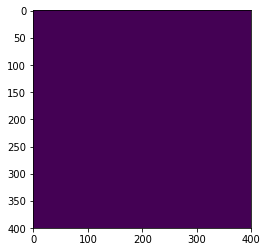

In [13]:
digits = cv2.imread('digits.png', cv2.IMREAD_GRAYSCALE)

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
print(cells.shape)
cells = cells.reshape(-1, 20, 20)

desc = []
for img in cells:
    dd = hog.compute(img)
    desc.append(dd)

train_desc = np.array(desc).squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# Training SVM

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)
svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)

# Tests

img = np.zeros((400, 400), np.uint8)

plt.imshow(img)

In [3]:
train_desc.shape

(5000, 324)

(array([153.,  40.,  28.,  26.,  21.,  43.,   6.,   4.,   1.,   2.]),
 array([0.        , 0.05419938, 0.10839875, 0.16259812, 0.2167975 ,
        0.27099687, 0.32519624, 0.3793956 , 0.433595  , 0.48779437,
        0.54199374], dtype=float32),
 <a list of 10 Patch objects>)

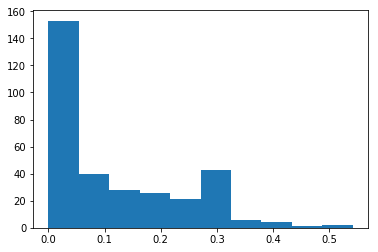

In [12]:
plt.hist(train_desc[0])

In [17]:
desc[0].shape

(324, 1)

TypeError: Invalid dimensions for image data

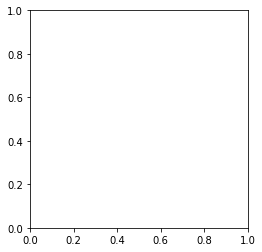

In [9]:
plt.imshow(train_desc[0])

In [7]:
train_labels.shape

(5000,)